# Dimensionality reduction techniques comparison

### Dataset



For simplicity we use the Wine dataset from sklearn (UCI).

Features:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280od315_of_diluted_wines'
- proline

Labels: Wine classes

In [ ]:
from sklearn.datasets import load_wine
import numpy as np

data = load_wine()
features = data["data"]
labels = data["target"]
features.shape

(178, 13)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
try:
  import ipyvolume as ipv
except:
  !pip install ipyvolume -q
  import ipyvolume as ipv
  !jupyter nbextension enable --py --sys-prefix ipyvolume

def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8,
                    palette="Greens", edgecolor="black")

def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=4, marker="sphere", color=color)
    ipv.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
Enabling notebook extension ipyvolume/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


### PCA

In [ ]:
# It's also possible to manually compute eigenvectors and eigenvalues
subset_idx = 3
cov = np.cov(features)[:subset_idx, :subset_idx]
eig_vals, eig_vecs = np.linalg.eig(cov)
print("Eigenvalues: \n", eig_vals)
print("Eigenvectors: \n", eig_vecs)

Eigenvalues: 
 [2.75887696e+05 5.66833522e+01 1.34732230e+00]
Eigenvectors: 
 [[-0.55810925 -0.78959847  0.25504573]
 [-0.55046096  0.12232505 -0.82585066]
 [-0.62089193  0.60130761  0.50291387]]


2D Projection

CPU times: user 2.45 ms, sys: 160 µs, total: 2.61 ms
Wall time: 2.74 ms


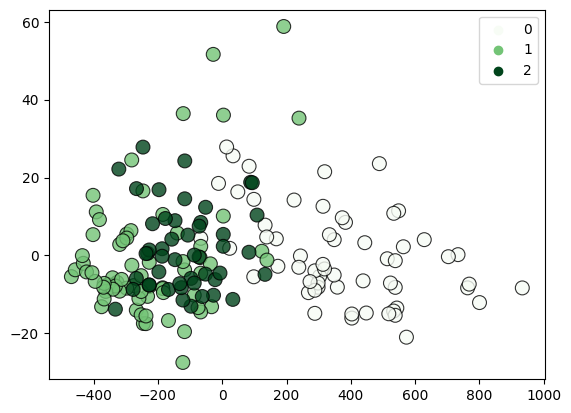

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
%time pca_2d = pca.fit_transform(features)
visualize_2d(x=pca_2d, labels=labels)

In [ ]:
print("Eigenvalues: \n", pca.explained_variance_ratio_)
print("Eigenvectors: \n", pca.components_)


Eigenvalues: 
 [0.99809123 0.00173592]
Eigenvectors: 
 [[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]


3D Projection

In [ ]:
pca = PCA(n_components=3)
%time pca_3d = pca.fit_transform(features)
visualize_3d(pca_3d, labels)

CPU times: user 1.42 ms, sys: 50 µs, total: 1.47 ms
Wall time: 1.49 ms


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### MDS

In [ ]:
# Precompute distance
from sklearn.metrics.pairwise import manhattan_distances

d_matrix = manhattan_distances(features)
d_matrix

array([[  0.  ,  51.06, 152.48, ..., 257.14, 249.41, 558.28],
       [ 51.06,   0.  , 148.3 , ..., 257.98, 250.55, 521.18],
       [152.48, 148.3 ,   0.  , ..., 384.76, 376.83, 649.14],
       ...,
       [257.14, 257.98, 384.76, ...,   0.  ,   8.15, 306.74],
       [249.41, 250.55, 376.83, ...,   8.15,   0.  , 312.09],
       [558.28, 521.18, 649.14, ..., 306.74, 312.09,   0.  ]])

Distance matrix of the first 10 data points...


<Axes: >

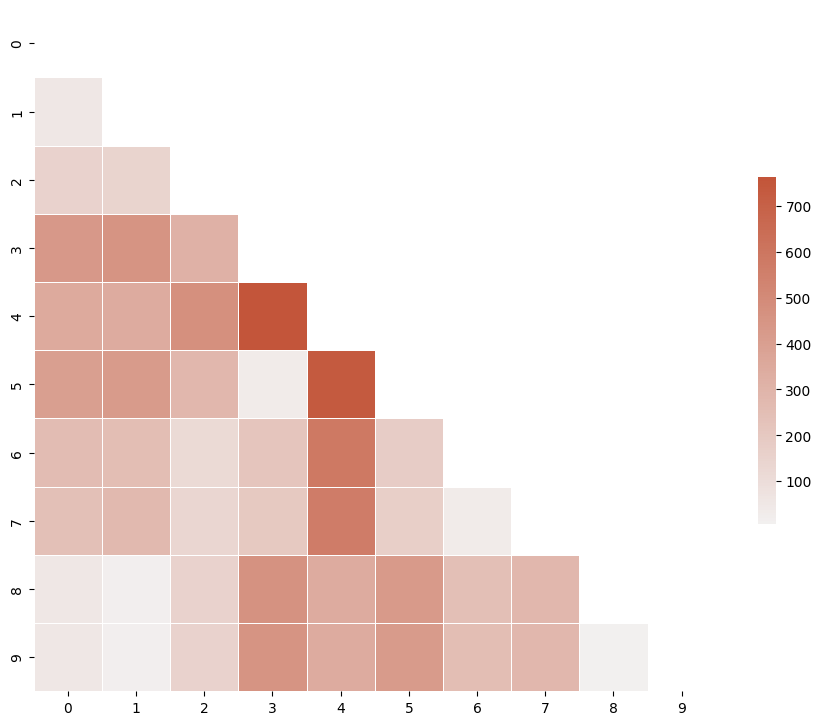

In [ ]:
import seaborn as sns
print("Distance matrix of the first 10 data points...")
distances = d_matrix[:10, :10]

mask = np.triu(np.ones_like(distances, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(distances, mask=mask, cmap=cmap, vmax=distances.max(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=3,
          normalized_stress=False,
          metric=True,
          dissimilarity="precomputed",
          random_state=2023,
          eps=1e-9)
%time mds_3d = mds.fit_transform(d_matrix)
visualize_3d(mds_3d, labels)

CPU times: user 1.13 s, sys: 888 ms, total: 2.02 s
Wall time: 1.07 s


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Note: It works better with Manhatten distances - most likely the high dimension is a problem using the euclidean distance

In [ ]:
print("Raw stress: ", mds.stress_)

Raw stress:  882441.0641476295


CPU times: user 1.12 s, sys: 849 ms, total: 1.97 s
Wall time: 1.03 s


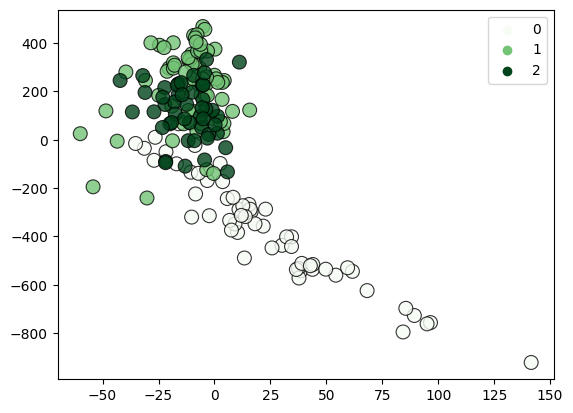

In [ ]:
mds = MDS(n_components=2, normalized_stress=False, eps=1e-9)
%time mds_2d = mds.fit_transform(features)
visualize_2d(mds_2d, labels)

### TSNE

In [ ]:
from sklearn.manifold import TSNE

%time tsne_3d = TSNE(n_components=3, perplexity=10, early_exaggeration=12, learning_rate='auto', init='pca', n_jobs=4).fit_transform(features)
visualize_3d(tsne_3d, labels)

CPU times: user 7.57 s, sys: 21.8 ms, total: 7.59 s
Wall time: 9.27 s


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

CPU times: user 1.25 s, sys: 7.55 ms, total: 1.26 s
Wall time: 668 ms


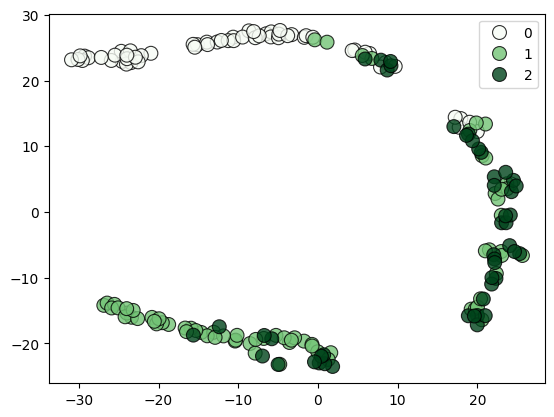

In [ ]:
%time tsne_2d = TSNE(n_components=2, perplexity=10, early_exaggeration=12, learning_rate='auto', init='random', n_jobs=4).fit_transform(features)
visualize_2d(tsne_2d, labels)

### UMAP

In [ ]:
try:
  import umap.umap_ as umap
except:
  !pip install umap-learn -q
  import umap.umap_ as umap


reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, metric='euclidean')
%time umap_3d = reducer.fit_transform(features)
visualize_3d(umap_3d, labels)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.6 MB/s eta 0:00:00
CPU times: user 9.56 s, sys: 90.6 ms, total: 9.65 s
Wall time: 9.69 s


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

CPU times: user 2.6 s, sys: 25.1 ms, total: 2.63 s
Wall time: 2.46 s


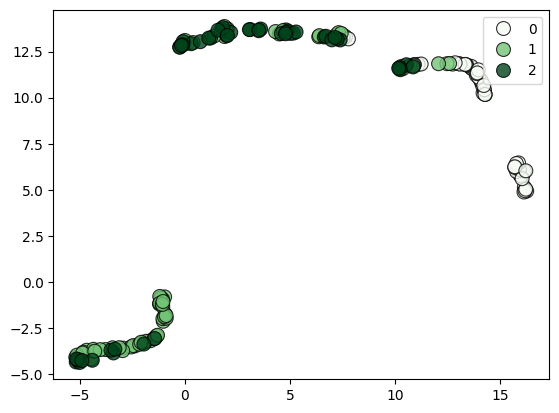

In [ ]:
reducer = reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
%time umap_2d = reducer.fit_transform(features)
visualize_2d(umap_2d, labels)